# Importing the relevant libraries

In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
import scipy 
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV

# Data Preprocessing

### Importing the Database

In [133]:
data=pd.read_csv("ml_datasource.csv")
data_1=data.copy()
data_1.head()


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

<AxesSubplot:xlabel='minutes_spent_on_exams', ylabel='Density'>

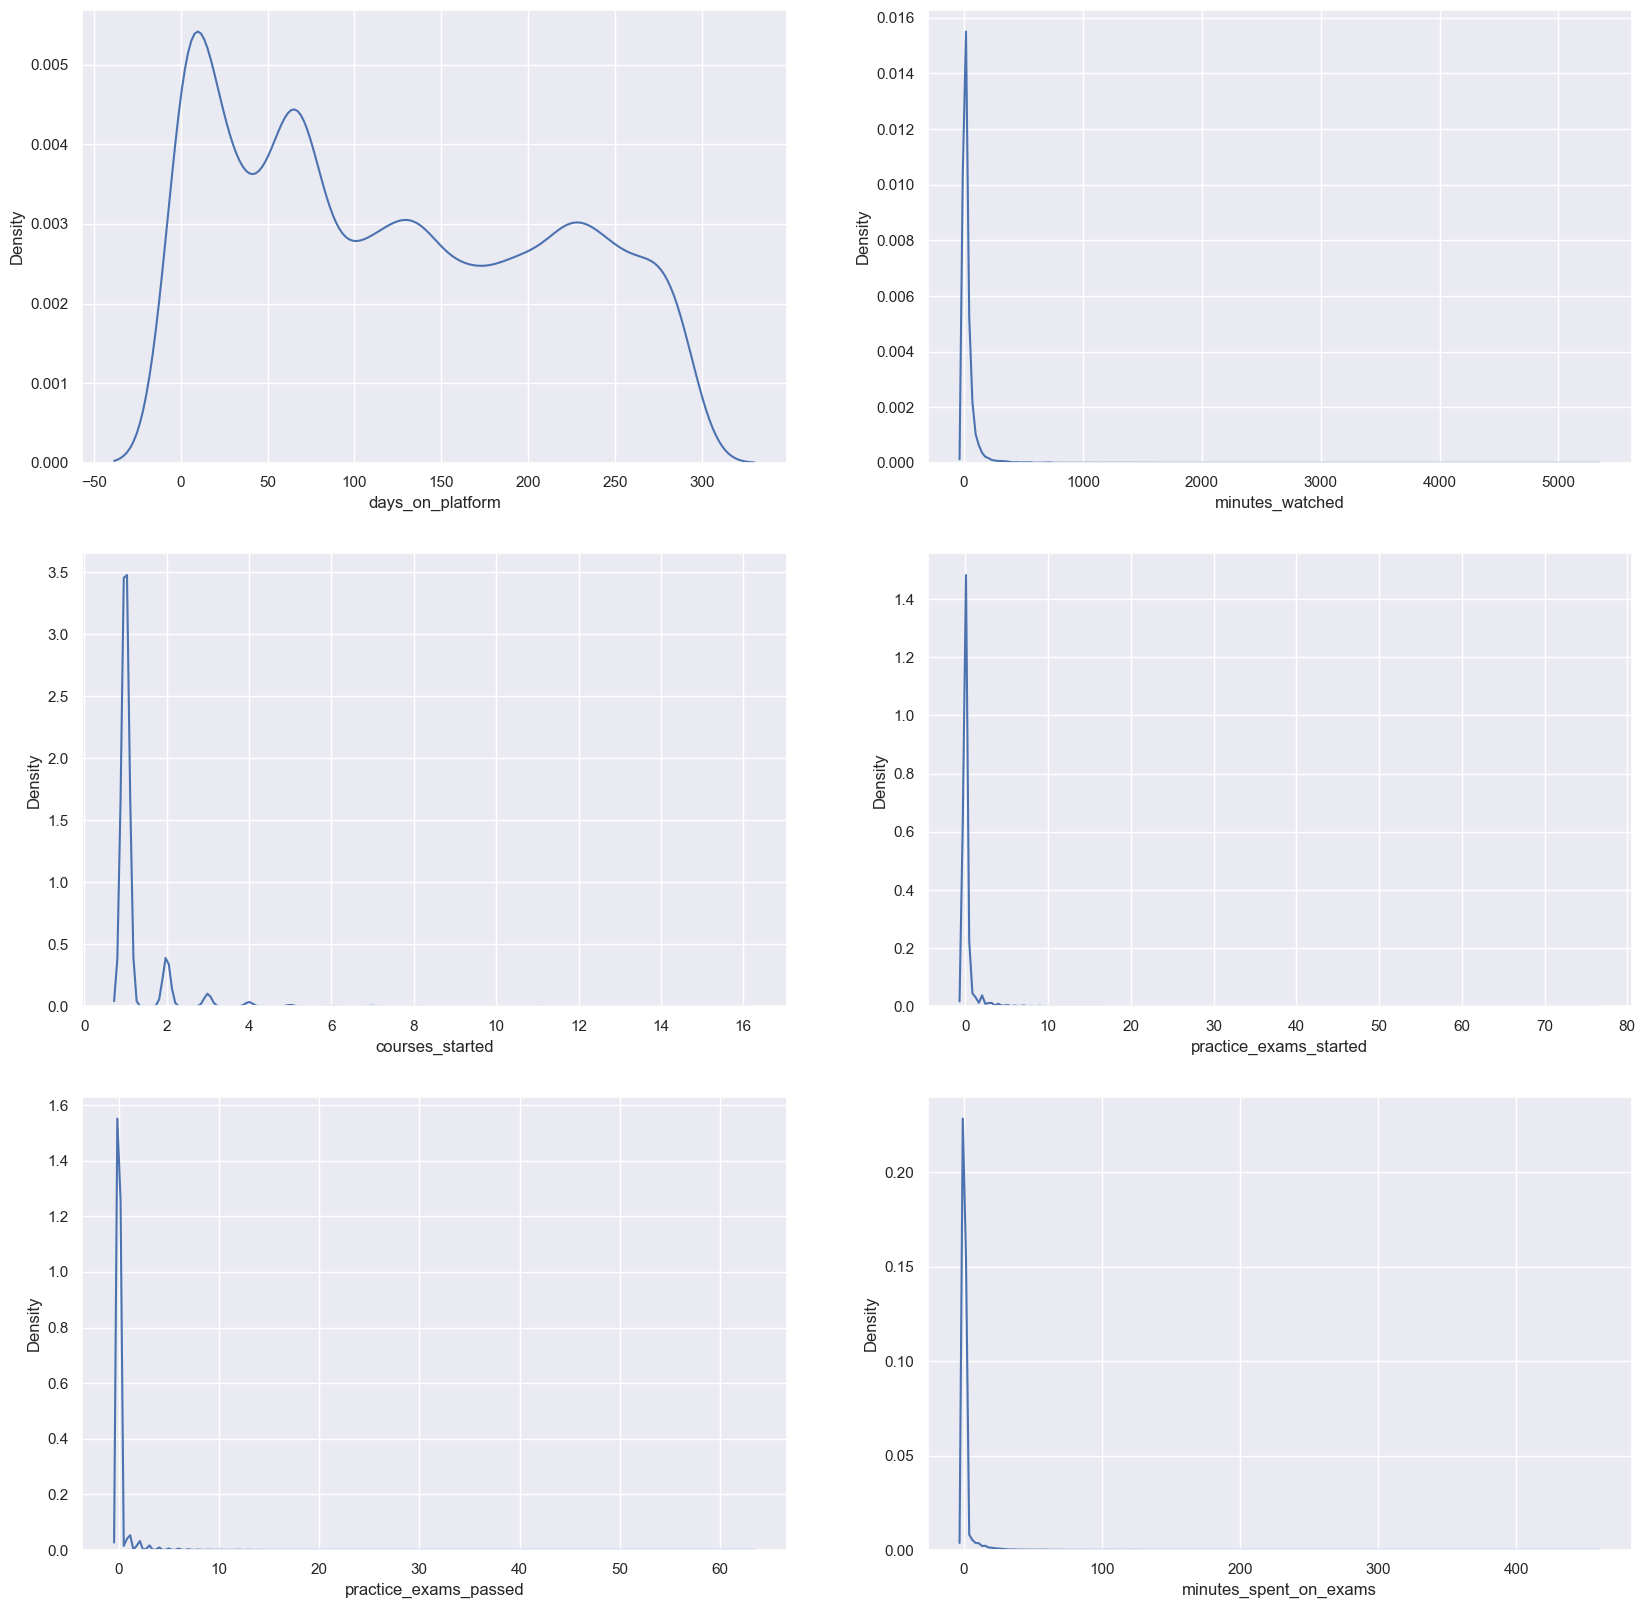

In [134]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data_1["days_on_platform"],ax=axes[0,0])
sns.kdeplot(data_1["minutes_watched"],ax=axes[0,1])
sns.kdeplot(data_1["courses_started"],ax=axes[1,0])
sns.kdeplot(data_1["practice_exams_started"],ax=axes[1,1])
sns.kdeplot(data_1["practice_exams_passed"],ax=axes[2,0])
sns.kdeplot(data_1["minutes_spent_on_exams"],ax=axes[2,1])

In [28]:
q=data_1["days_on_platform"].quantile(0.99)
data_2=data_1[data_1["days_on_platform"]<q]
data_2.describe

<bound method NDFrame.describe of       student_country  days_on_platform  minutes_watched  courses_started  \
0                  US               288            358.1                1   
1                  SG               260              1.7                1   
2                  TR               260             22.4                1   
3                  KE               259             18.8                1   
4                  IN               259            118.0                2   
...               ...               ...              ...              ...   
17756              EG                 0              0.8                1   
17757              IN                 0              0.1                1   
17758              CM                 0              7.8                1   
17759              CA                 0             10.4                1   
17760              SA                 0              0.1                1   

       practice_exams_started  practice_e

In [135]:
data_3=data_2[data_2["minutes_watched"]<=1000]

In [30]:
data_4=data_3[data_3["courses_started"]<=10]

In [136]:
data_5=data_4[data_4["practice_exams_started"]<=10]

In [137]:
data_6=data_5[data_5["minutes_spent_on_exams"]<=40]

<AxesSubplot:xlabel='minutes_spent_on_exams', ylabel='Density'>

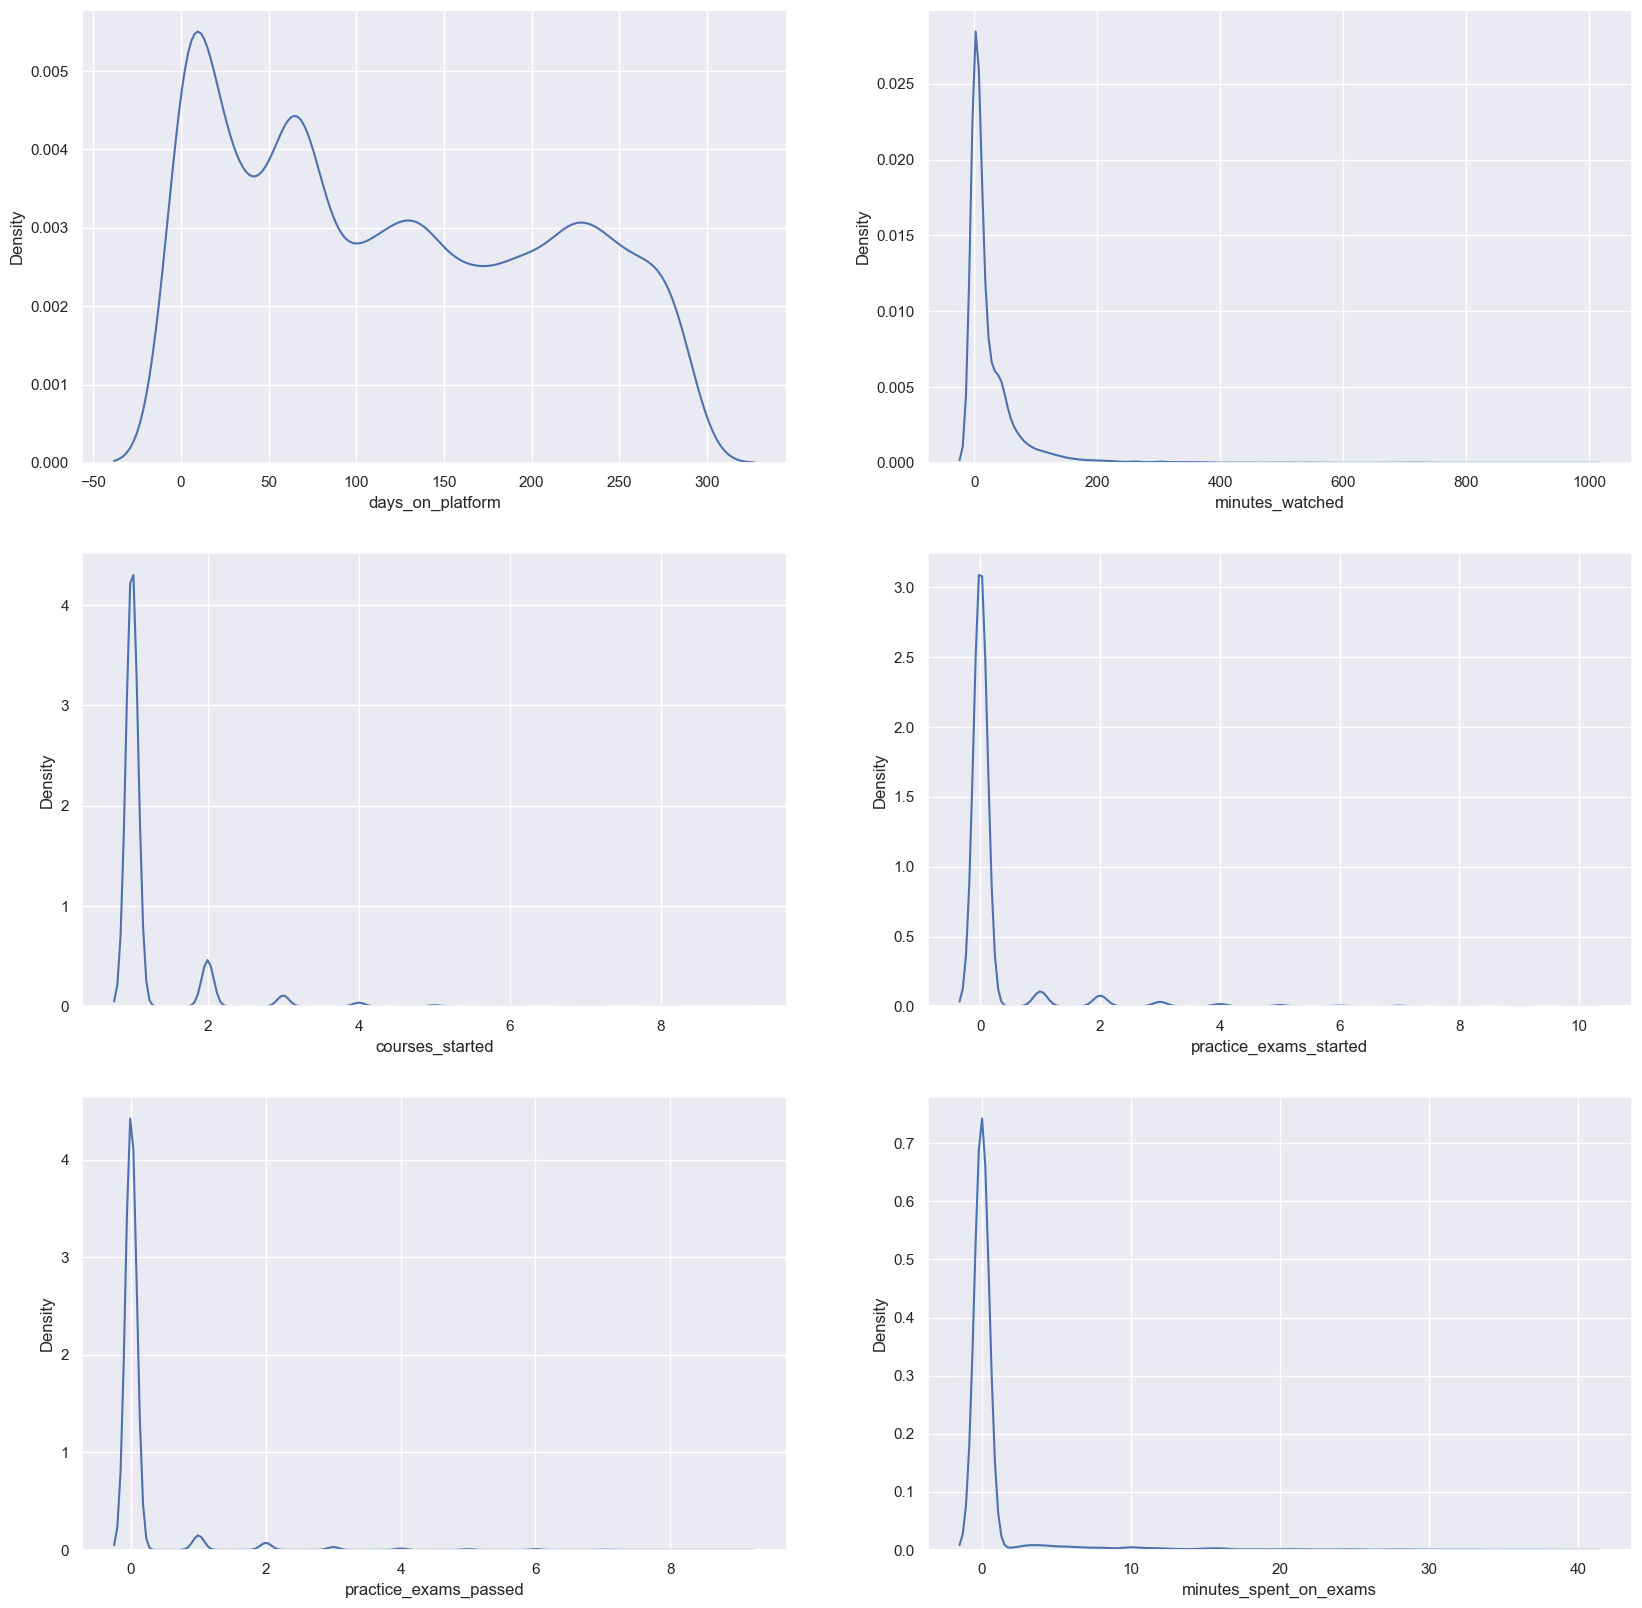

In [138]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data_6["days_on_platform"],ax=axes[0,0])
sns.kdeplot(data_6["minutes_watched"],ax=axes[0,1])
sns.kdeplot(data_6["courses_started"],ax=axes[1,0])
sns.kdeplot(data_6["practice_exams_started"],ax=axes[1,1])
sns.kdeplot(data_6["practice_exams_passed"],ax=axes[2,0])
sns.kdeplot(data_6["minutes_spent_on_exams"],ax=axes[2,1])

In [139]:
data_no_outliers=data_6.copy()

### Checking for Multicollinearity

In [140]:
data_no_outliers.columns.values

array(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started',
       'practice_exams_passed', 'minutes_spent_on_exams', 'purchased'],
      dtype=object)

In [141]:
variables=data[['days_on_platform','minutes_watched','courses_started','practice_exams_started',
               'practice_exams_passed', 'minutes_spent_on_exams']]


In [142]:
variables.shape

(17761, 6)

In [143]:
vif = pd.DataFrame()
vif["columns"]=['days_on_platform','minutes_watched','courses_started','practice_exams_started',
               'practice_exams_passed', 'minutes_spent_on_exams']
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif


,columns,VIF
0,days_on_platform,2.201034
1,minutes_watched,2.164842
2,courses_started,2.915547
3,practice_exams_started,7.800678
4,practice_exams_passed,6.644244
5,minutes_spent_on_exams,3.711333


In [44]:
# Practice_exams_started and Pracitce_exams_passed has to be removed


In [144]:
data_no_mult=data_no_outliers.drop(["practice_exams_started","practice_exams_passed"],axis=1)

In [145]:
data_no_mult

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0
17757,IN,0,0.1,1,0.00,0
17758,CM,0,7.8,1,0.00,0
17759,CA,0,10.4,1,0.00,0


### Dealing with NaN Values

In [146]:
data_no_mult.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [147]:
data_no_mult.loc[data_no_mult['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,11.20,1
337,NaN,86,43.0,1,12.96,0
556,NaN,121,241.9,2,21.29,0
806,NaN,64,86.4,1,4.98,0
1097,NaN,72,67.5,1,6.27,0
12363,NaN,84,6.2,1,0.00,0
12633,NaN,78,3.0,1,0.00,0
16946,NaN,11,8.2,1,0.00,0


In [157]:
data_no_mult["student_country"].fillna("NAM",axis=0)

0        US
1        SG
2        TR
3        KE
4        IN
         ..
17756    EG
17757    IN
17758    CM
17759    CA
17760    SA
Name: student_country, Length: 17435, dtype: object

In [158]:
data_no_mult.isna().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [168]:
data_no_mult["student_country"][311]= "NAM"

C:\Users\arsalan\AppData\Local\Temp\ipykernel_20932\1662196000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mult["student_country"][311]= "NAM"


In [170]:
data_no_nulls=data_no_mult.fillna("NAM",axis=1)

In [171]:
data_no_nulls.isna().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

# Splitting The Data


In [172]:
inputs=data_no_nulls.drop(["purchased"],axis=1)
target=data_no_nulls["purchased"]


In [173]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=54,stratify=target)

### Encoding the Data

In [174]:
enc=OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=170)



In [175]:
x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))


In [176]:
x_test["student_country_enc"]=enc.transform(x_test["student_country"].to_numpy().reshape(-1,1))

In [180]:
x_train=x_train.drop(["student_country"],axis=1)
x_test=x_test.drop(["student_country"],axis=1)


KeyError: "['student_country'] not found in axis"

In [248]:
x_test.shape

(3487, 5)

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
5237,225,31.4,1,0.0,51.0
11643,101,3.8,1,0.0,92.0
9211,145,1.0,1,0.0,123.0
5570,220,0.1,1,0.0,121.0
374,81,43.5,1,3.21,70.0
...,...,...,...,...,...
11243,110,6.1,1,0.0,70.0
6672,0,88.0,1,0.0,27.0
5692,218,43.8,1,0.0,53.0
5107,227,2.1,1,0.0,12.0


In [182]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

# Scaling

In [185]:
scale=StandardScaler()
x_train_sc=scale.fit_transform(x_train_array)
x_test_sc=scale.transform(x_test_array)

# Creating a Logistic Regression Model

In [189]:
x=sm.add_constant(x_train_sc)
reg_log=sm.Logit(y_train_array,x)
results_log=reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.154368
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                13948
Model:                          Logit   Df Residuals:                    13942
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.5016
Time:                        20:59:25   Log-Likelihood:                -2153.1
converged:                       True   LL-Null:                       -4320.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8578      0.232    -33.809      0.000      -8.313      -7.402
x1            -5.8311      0.191    -30.515      0.000      -6.206      -5.457
x2             0.7209      0.041     17.699      0.000       0.641       0.801
x3             0.1273      0.044      2.920      0.004       0.042       0.213
x4            -0.1960      0.036     -5.492      0.000      -0.266      -0.126
x5             0.2759      0.036      7.614      0.000       0.205       0.347
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [190]:
cm_df = pd.DataFrame(results_log.pred_table())
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9513191855463149

In [249]:
cm

array([[12511.,   138.],
       [  541.,   758.]])

In [191]:
# We Can Also Do it with Logistic Regression Model from Sklearn

In [192]:
log_model = LogisticRegression()


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best penalty value: none
Best C value: 0.1
Best solver value: newton-cg
Best max_iter value: 100
Best accuracy: 0.9503158208579275
               precision    recall  f1-score   support

Not Purchased       0.96      0.99      0.97      3162
    Purchased       0.84      0.60      0.70       325

     accuracy                           0.95      3487
    macro avg       0.90      0.79      0.84      3487
 weighted avg       0.95      0.95      0.95      3487




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

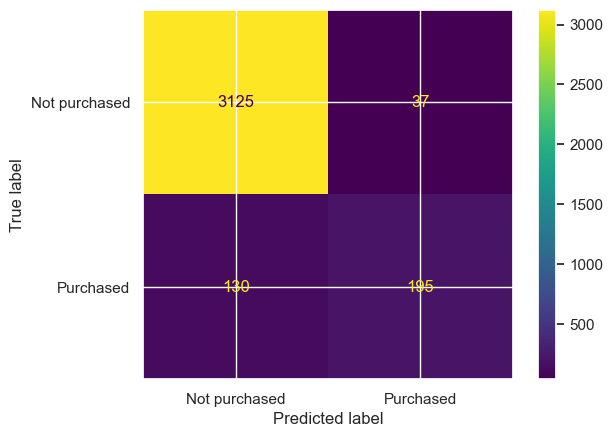

In [202]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search_log = GridSearchCV(log_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_log.fit(x_train_sc, y_train_array)
test_score_log = grid_search_log.best_estimator_.score(x_train_sc, y_train_array)

print(f"Best penalty value: {grid_search_log.best_params_['penalty']}")
print(f"Best C value: {grid_search_log.best_params_['C']}")
print(f"Best solver value: {grid_search_log.best_params_['solver']}")
print(f"Best max_iter value: {grid_search_log.best_params_['max_iter']}")
print(f"Best accuracy: {grid_search_log.best_score_}")
labels=["Not Purchased","Purchased"]
y_true, y_pred_log = y_test_array, grid_search_log.predict(x_test_sc)
print(classification_report(y_true, y_pred_log,target_names=labels))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_log,display_labels=["Not purchased","Purchased"])
print()


# Creating a K-Nearest Neighbors Model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 549, in _fit
    self._tree = BallTree(
  File "sklearn\neighbors\_binary_tree.pxi", line 96

Best hyperparameters found:
weights: distance
p: 1
n_neighbors: 27
metric: manhattan
leaf_size: 29
algorithm: auto
Best accuracy: 0.9540437535582056
               precision    recall  f1-score   support

Not Purchased       0.97      0.99      0.98      3162
    Purchased       0.84      0.72      0.77       325

     accuracy                           0.96      3487
    macro avg       0.91      0.85      0.88      3487
 weighted avg       0.96      0.96      0.96      3487




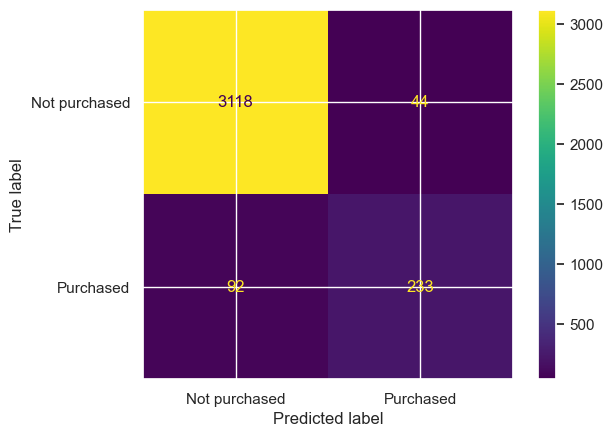

In [207]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 50)),
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
}
model_knn=KNeighborsClassifier()

rand_search_knn = RandomizedSearchCV(model_knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rand_search_knn.fit(x_train_sc, y_train_array)
test_score_knn = rand_search_knn.best_estimator_.score(x_train_sc, y_train_array)

print("Best hyperparameters found:")
for key, value in rand_search_knn.best_params_.items():
    print(f"{key}: {value}")

print(f"Best accuracy: {rand_search_knn.best_score_}")

labels=["Not Purchased","Purchased"]
y_true, y_pred_knn = y_test_array, rand_search_knn.predict(x_test_sc)
print(classification_report(y_true, y_pred_knn,target_names=labels))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_knn,display_labels=["Not purchased","Purchased"])
print()


# Creating a Support Vector Machines Model

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best kernel value: rbf
Best C value: 10
Best gamma value: scale
               precision    recall  f1-score   support

Not Purchased       0.97      0.99      0.98      3162
    Purchased       0.85      0.71      0.77       325

     accuracy                           0.96      3487
    macro avg       0.91      0.85      0.87      3487
 weighted avg       0.96      0.96      0.96      3487




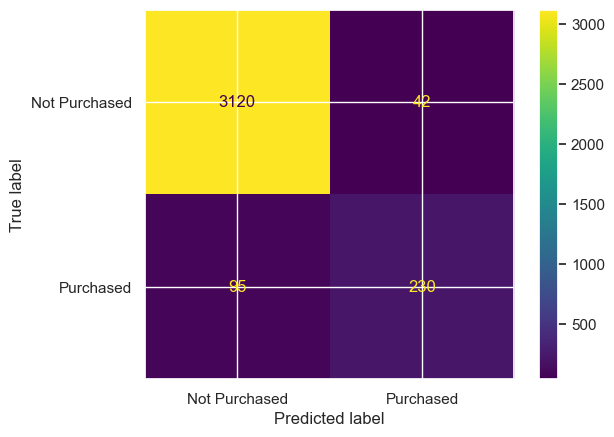

In [228]:
from sklearn.svm import SVC

model_svm=SVC()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search_svm = GridSearchCV(model_svm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(x_train_sc,y_train_array)
test_score_svm = grid_search_svm.best_estimator_.score(x_train_sc, y_train_array)

print(f"Best kernel value: {grid_search_svm.best_params_['kernel']}")
print(f"Best C value: {grid_search_svm.best_params_['C']}")
print(f"Best gamma value: {grid_search_svm.best_params_['gamma']}")
y_true, y_pred_knn = y_test_array, grid_search_svm.predict(x_test_sc)

labels=["Not Purchased","Purchased"]
print(classification_report(y_true, y_pred_knn,target_names=labels))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_knn,display_labels=["Not Purchased","Purchased"])
print()


# Creating a Decision Trees Model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best criterion: entropy
Best splitter: random
Best max_depth: 20
Best min_samples_split: 2
Best min_samples_leaf: 8
Best min_samples_leaf: 8
Best min_weight_fraction_leaf: 0.0
Best max_features: None
Best max_leaf_nodes: 10
Best min_impurity_decrease: 0.0
Best class_weight: None
               precision    recall  f1-score   support

Not Purchased       0.98      0.96      0.97      3162
    Purchased       0.70      0.83      0.76       325

     accuracy                           0.95      3487
    macro avg       0.84      0.90      0.86      3487
 weighted avg       0.96      0.95      0.95      3487




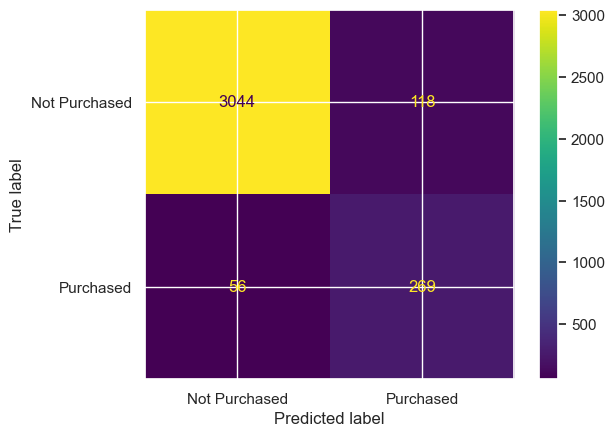

In [242]:
from sklearn.tree import DecisionTreeClassifier,plot_tree


model_dt=DecisionTreeClassifier(ccp_alpha=0.0001,random_state=365)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': [None, 'balanced']
}

rand_search_dt = RandomizedSearchCV(model_dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rand_search_dt.fit(x_train_array,y_train_array)
test_score_dt = rand_search_dt.best_estimator_.score(x_train_array, y_train_array)

print(f"Best criterion: {rand_search_dt.best_params_['criterion']}")
print(f"Best splitter: {rand_search_dt.best_params_['splitter']}")
print(f"Best max_depth: {rand_search_dt.best_params_['max_depth']}")
print(f"Best min_samples_split: {rand_search_dt.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {rand_search_dt.best_params_['min_samples_leaf']}")
print(f"Best min_samples_leaf: {rand_search_dt.best_params_['min_samples_leaf']}")
print(f"Best min_weight_fraction_leaf: {rand_search_dt.best_params_['min_weight_fraction_leaf']}")
print(f"Best max_features: {rand_search_dt.best_params_['max_features']}")
print(f"Best max_leaf_nodes: {rand_search_dt.best_params_['max_leaf_nodes']}")
print(f"Best min_impurity_decrease: {rand_search_dt.best_params_['min_impurity_decrease']}")
print(f"Best class_weight: {rand_search_dt.best_params_['class_weight']}")

labels=["Not Purchased","Purchased"]
y_true, y_pred_dt = y_test_array, rand_search_dt.predict(x_test_array)
print(classification_report(y_true, y_pred_dt,target_names=labels))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_dt,display_labels=["Not Purchased","Purchased"])
print()


[Text(0.5416666666666666, 0.9, 'X[0] <= 7.5\ngini = 0.169\nsamples = 13948\nvalue = [12649, 1299]'),
 Text(0.3333333333333333, 0.7, 'X[1] <= 6.15\ngini = 0.439\nsamples = 1503\nvalue = [488, 1015]'),
 Text(0.16666666666666666, 0.5, 'X[0] <= 0.5\ngini = 0.431\nsamples = 436\nvalue = [299, 137]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.367\nsamples = 120\nvalue = [29, 91]'),
 Text(0.25, 0.3, 'gini = 0.249\nsamples = 316\nvalue = [270, 46]'),
 Text(0.5, 0.5, 'X[0] <= 1.5\ngini = 0.292\nsamples = 1067\nvalue = [189, 878]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.139\nsamples = 624\nvalue = [47, 577]'),
 Text(0.5833333333333334, 0.3, 'X[1] <= 31.85\ngini = 0.436\nsamples = 443\nvalue = [142, 301]'),
 Text(0.5, 0.1, 'gini = 0.49\nsamples = 161\nvalue = [92, 69]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.292\nsamples = 282\nvalue = [50, 232]'),
 Text(0.75, 0.7, 'X[1] <= 78.0\ngini = 0.045\nsamples = 12445\nvalue = [12161, 284]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.028\nsamples = 1

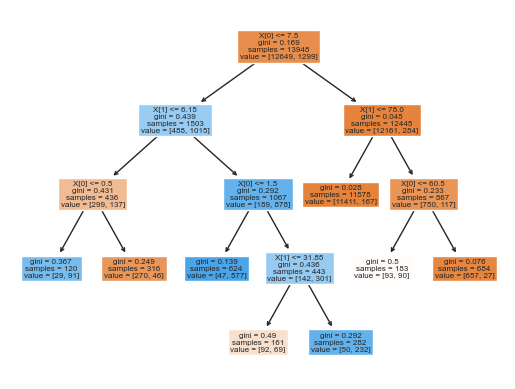

In [247]:
model_dt_1=DecisionTreeClassifier(ccp_alpha=0.002,random_state=365)
model_dt_1.fit(x_train_array,y_train_array)
plot_tree(model_dt_1,filled=True)

# Creating a Random Forests Model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Pr

Best hyperparameters found:
warm_start: False
oob_score: False
n_estimators: 300
min_weight_fraction_leaf: 0.0
min_samples_split: 20
min_samples_leaf: 6
min_impurity_decrease: 0.0
max_leaf_nodes: 40
max_features: log2
max_depth: 30
criterion: gini
class_weight: None
bootstrap: False
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3162
           1       0.88      0.75      0.81       325

    accuracy                           0.97      3487
   macro avg       0.93      0.87      0.90      3487
weighted avg       0.97      0.97      0.97      3487




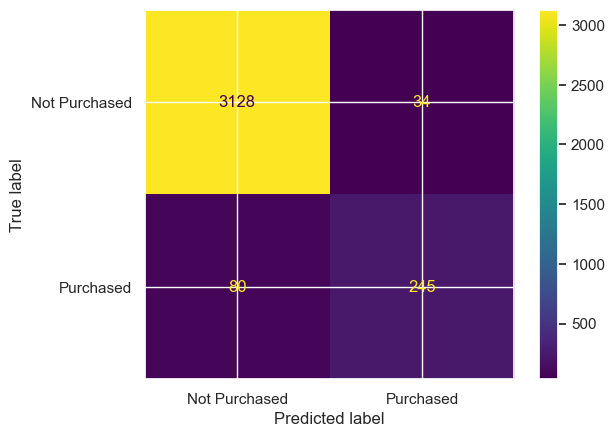

In [235]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(ccp_alpha=0.0001,random_state=365)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'warm_start': [False, True],
    'oob_score': [False, True]
}

rand_search_rf = RandomizedSearchCV(model_rf, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rand_search_rf.fit(x_train_array, y_train_array)
test_score_rf = rand_search_rf.best_estimator_.score(x_train_array, y_train_array)

print("Best hyperparameters found:")
for key, value in rand_search_rf.best_params_.items():
    print(f"{key}: {value}")


y_true, y_pred_rf = y_test_array, rand_search_rf.predict(x_test_array)
print(classification_report(y_true, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_rf,display_labels=["Not Purchased","Purchased"])
print()

In [252]:
from sklearn.metrics import accuracy_score


# Logistic Regression

y_pred_log= grid_search_log.predict(x_test_sc)
acc_log = accuracy_score(y_test_array, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log}")


# SVM 

y_pred_svm =  grid_search_svm.predict(x_test_sc)
acc_svm = accuracy_score(y_test_array, y_pred_svm)
print(f"SVM Classification Accuracy: {acc_svm}")


#Knn

y_pred_knn = rand_search_knn.predict(x_test_sc)
acc_knn = accuracy_score(y_test_array, y_pred_knn)
print(f"KNN Accuracy: {acc_knn}")



# Decision Tree

y_pred_dt = rand_search_dt.predict(x_test_array)
acc_dt = accuracy_score(y_test_array, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt}")


# Random Forest

y_pred_rf = rand_search_rf.predict(x_test_array)
acc_rf = accuracy_score(y_test_array, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")



acc_list=[acc_log,acc_svm,acc_dt,acc_rf,acc_knn]
acc_list=sorted(acc_list,reverse=True)
acc_list

Logistic Regression Accuracy: 0.9521078290794379
SVM Classification Accuracy: 0.9607112130771437
KNN Accuracy: 0.9609979925437339
Decision Tree Accuracy: 0.9067966733581876
Random Forest Accuracy: 0.967307140808718


[0.967307140808718,
 0.9609979925437339,
 0.9607112130771437,
 0.9521078290794379,
 0.9067966733581876]

In [253]:
print(f"the best accuracy is Random Forest with the accuracy of {acc_list[0]}")

the best accuracy is Random Forest with the accuracy of 0.967307140808718
